In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

In [9]:
data = pd.read_csv("Exports/all_texting_history_by_month.csv")
data['date'] = pd.to_datetime(data['Month'].astype(str) + "-" + data['Year'].astype(str))
data['is_from_me'].replace(to_replace=0, value="to me", inplace=True)
data['is_from_me'].replace(to_replace=1, value="from me", inplace=True)

   Year  Month is_from_me  count(rowid)       date
0  2013     11      to me           104 2013-11-01
1  2013     11    from me           108 2013-11-01
2  2013     12      to me           836 2013-12-01
3  2013     12    from me           775 2013-12-01
4  2014      1      to me           730 2014-01-01


2013

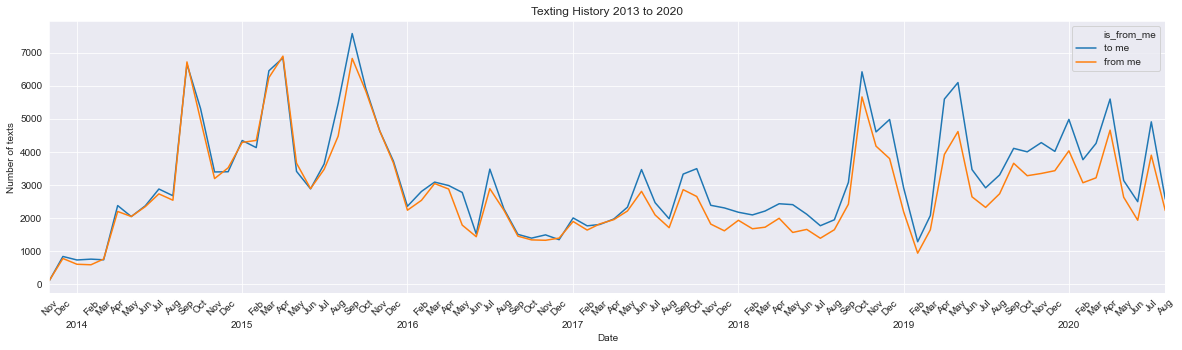

In [25]:
# https://stackoverflow.com/questions/47303027/changing-axis-ticks-in-seaborn-stripplotwhere-x-value-is-a-time-stamp
fig, ax = plt.subplots(figsize=(20,5))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='count(rowid)', hue='is_from_me', data=data)
ax.legend(bbox_to_anchor=(1, 1), ncol=1)
ax.set_aspect('auto')
ax.set_title(f"Texting History {dt.strftime(data.date.min(), '%Y')} to {dt.strftime(data.date.max(), '%Y')}")
ax.set_ylabel("Number of texts")
ax.set_xlabel("Date")

# For the x-axis
years = mdates.YearLocator()   # set yearly ticker 
months = mdates.MonthLocator()  # set monthly ticker 
yearsFmt = mdates.DateFormatter('\n\n%Y') # set format for year 
monthsFmt = mdates.DateFormatter('%b') # %m for number eg (01, 02, etc)
ax.xaxis.set_major_locator(years) 
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
datemin = dt.date(data.date.min())
datemax = dt.date(data.date.max())
ax.set_xlim(datemin, datemax)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)
plt.show()

fig.savefig(f"Texting History {dt.strftime(data.date.min(), '%Y')} to {dt.strftime(data.date.max(), '%Y')}.png",bbox_inches='tight')